# 돌아감 정확도 33%
## optimizer adam대신 sgd 사용



In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [50]:
data = pd.read_excel('wireless_softmax.xlsx')
data = data.iloc[:,0:8]
data.head()

,userid,Low price,Noise cancelling,Battery time,Light weight,Brand,Sound Quality,wish device
0,1,1,4,3,5,6,2,Airpod pro
1,2,3,5,4,6,2,1,Buds pro
2,3,4,3,5,6,2,1,Buds pro
3,4,3,4,6,5,1,2,Buds pro
4,5,4,5,2,1,6,3,Airpod pro


In [51]:
#sns.set(style = 'ticks', color_codes = True)
#g = sns.pairplot(data , hue = 'wish device', palette = 'husl')

In [52]:
#sns.barplot(data['wish device'], data['Low price'], ci = None)

In [53]:
#data['wish device'].value_counts().plot(kind = 'bar')

In [54]:
data['wish device'] = data['wish device'].\
replace(['Airpod pro','Buds pro', 'Airpod 3','SONY WF-1000XM4', 'Airpod 2', 'QCY T13', 'Buds 2' ],\
        [0,1,2,3,4,5,6])
#data['wish device'].value_counts().plot(kind = 'bar')

y_test나 y_train에 7이 없으면 6개로만 나옴.


In [55]:
pd.get_dummies(data['wish device'])

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
81,0,1,0,0,0,0,0
82,0,0,0,1,0,0,0
83,0,0,0,1,0,0,0
84,0,0,1,0,0,0,0


In [56]:
one_hot_data = pd.get_dummies(data = data, columns = ['wish device'])
one_hot_data

,userid,Low price,Noise cancelling,Battery time,Light weight,Brand,Sound Quality,wish device_0,wish device_1,wish device_2,wish device_3,wish device_4,wish device_5,wish device_6
0,1,1,4,3,5,6,2,1,0,0,0,0,0,0
1,2,3,5,4,6,2,1,0,1,0,0,0,0,0
2,3,4,3,5,6,2,1,0,1,0,0,0,0,0
3,4,3,4,6,5,1,2,0,1,0,0,0,0,0
4,5,4,5,2,1,6,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,3,4,2,5,6,1,0,1,0,0,0,0,0
82,83,6,3,1,4,5,2,0,0,0,1,0,0,0
83,84,5,6,1,2,4,3,0,0,0,1,0,0,0
84,85,4,6,3,5,1,2,0,0,1,0,0,0,0


In [57]:
data_X = one_hot_data[['Low price', 'Noise cancelling', 'Battery time', 'Light weight', 'Brand', 'Sound Quality']].values
data_y = one_hot_data.iloc[:,7:].values
print(data_X[:5])
print(data_y[:5])

[[1 4 3 5 6 2]
 [3 5 4 6 2 1]
 [4 3 5 6 2 1]
 [3 4 6 5 1 2]
 [4 5 2 1 6 3]]
[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


In [58]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
print(y_train[:5])
print(y_test[:5])


[[0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]]
[[0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0]]


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [60]:
model = Sequential()
model.add(Dense(7, input_dim=6, activation='softmax'))

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [62]:
#history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/50
68/68 [==============================] - 0s 3ms/step - loss: 3.4484 - accuracy: 0.1912 - val_loss: 2.9351 - val_accuracy: 0.1111
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 2.2339 - accuracy: 0.2941 - val_loss: 2.3986 - val_accuracy: 0.2778
Epoch 3/50
68/68 [==============================] - 0s 2ms/step - loss: 1.9710 - accuracy: 0.3529 - val_loss: 2.3420 - val_accuracy: 0.2222
Epoch 4/50
68/68 [==============================] - 0s 2ms/step - loss: 1.9093 - accuracy: 0.3382 - val_loss: 2.0370 - val_accuracy: 0.2222
Epoch 5/50
68/68 [==============================] - 0s 2ms/step - loss: 1.8381 - accuracy: 0.3529 - val_loss: 2.1309 - val_accuracy: 0.2778
Epoch 6/50
68/68 [==============================] - 0s 2ms/step - loss: 1.7464 - accuracy: 0.3676 - val_loss: 2.0972 - val_accuracy: 0.3333
Epoch 7/50
68/68 [==============================] - 0s 2ms/step - loss: 1.6369 - accuracy: 0.4118 - val_loss: 1.7391 - val_accuracy: 0.2222
Epoch 8/50
68/68 [==

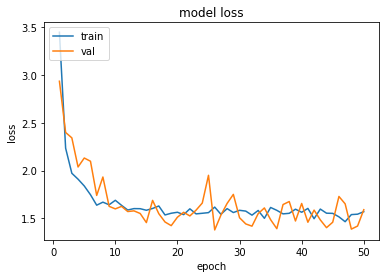

In [63]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [64]:
model.evaluate(X_test, y_test)[1]

1/1 [==============================] - 0s 94ms/step - loss: 1.5896 - accuracy: 0.3889


0.3888888955116272